In [2]:
from IPython.display import Image
Image(url="https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/antarctica-map.png", width=600)

In [3]:
Image(url="https://camo.githubusercontent.com/9b8b626c21f2972b2365ccbbb7031a852d043a8d07e4daa838550289f525f654/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67", width=600)

# Regression with Neural Network
This is a demo program that predicts the salary (in USD) of employees working in Data Science, AI/ML jobs.

In [ ]:
# Importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
!pip install palmerpenguins
from palmerpenguins import load_penguins

In [ ]:
# check for our GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
 # Read in the csv file
df = load_penguins()

In [ ]:
# Investigate the csv file
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [ ]:
# Drop unnecessary columns. We only want to predict the salary in us dollars.
df.drop(columns='year', inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
# Check if there are null data.
np.sum(df.isnull(), axis=0)

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
# Remove any rows with null values.
df.dropna(inplace=True)
np.sum(df.isnull(), axis=0)

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
# check how many rows we
f'{len(load_penguins())} ==> {len(df)} ({len(load_penguins()) - len(df)})'

'344 ==> 333 (11)'

In [ ]:
# Investigate the datatypes and decide how to the clean the data. Here we use one hot encoding.
df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [ ]:
# One hot encoding: extract all the column names that need to be encoded, which is all the object fields.
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['species', 'island', 'sex']

In [ ]:
# Use OneHotEncoder to encode.
encoder = OneHotEncoder(sparse_output=False, dtype='int64')
encoded_features = encoder.fit_transform(df[to_encode])
encoded_features

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0]])

In [ ]:
np.unique(encoded_features)

array([0, 1])

In [ ]:
# Convert to data frame with correct label names.
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
encoded_df

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,1,1,0
2,1,0,0,0,0,1,1,0
3,1,0,0,0,0,1,1,0
4,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
328,0,1,0,0,1,0,0,1
329,0,1,0,0,1,0,1,0
330,0,1,0,0,1,0,0,1
331,0,1,0,0,1,0,0,1


**The following few blocks merge the encoded dataframe to the original dataframe.**

In [ ]:
df.drop(columns=to_encode, inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [ ]:
df = df.join(encoded_df)

In [ ]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
3,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
4,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207.0,4000.0,0,1,0,0,1,0,0,1
329,43.5,18.1,202.0,3400.0,0,1,0,0,1,0,1,0
330,49.6,18.2,193.0,3775.0,0,1,0,0,1,0,0,1
331,50.8,19.0,210.0,4100.0,0,1,0,0,1,0,0,1


In [ ]:
# Create and inspect the list of features.
feature_list = df.columns.to_list()
feature_list.remove('bill_length_mm')  # bill_length_mm will be our output column!
feature_list

['bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'species_Adelie',
 'species_Chinstrap',
 'species_Gentoo',
 'island_Biscoe',
 'island_Dream',
 'island_Torgersen',
 'sex_female',
 'sex_male']

In [ ]:
print(len(feature_list))

11


In [ ]:
# Seperate the dataframe into features (X) and labels (y)
X = df[feature_list]  # inputs
y = df['bill_length_mm']  # outputs

In [ ]:
X.head()

,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
3,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
4,20.6,190.0,3650.0,1,0,0,0,0,1,0,1


In [ ]:
y.head()

,bill_length_mm
0,39.1
1,39.5
2,40.3
3,36.7
4,39.3


In [ ]:
# Scaling dataset. Changed the unit of y to 10K.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Y_scaled = scaler_y.fit_transform(y)
print(f'X ==> min: {np.min(X)}, mean: {np.mean(X)}, max: {np.max(X)}')
print(f'y ==> min: {np.min(y)}, mean: {np.mean(y)}, max: {np.max(y)}')
y = y/100

X ==> min: 0.0, mean: 402.5626262626262, max: 6300.0
y ==> min: 0.321, mean: 0.43992792792792795, max: 0.596


In [ ]:
f'X_scaled ==> min: {np.min(X_scaled)}, mean: {np.mean(X_scaled)}, max: {np.max(X_scaled)}'

'X_scaled ==> min: -2.0698519502697263, mean: -6.983220990271255e-17, max: 2.6031438906770874'

In [ ]:
f'y ==> min: {np.min(y)}, mean: {np.mean(y)}, max: {np.max(y)}'

'y ==> min: 0.00321, mean: 0.004399279279279279, max: 0.00596'

In [ ]:
# Split the X and y into train set and test set.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(266, 11) (67, 11) (266,) (67,)


In [ ]:
# Declaring the deep neural network model
nn_model = Sequential()

# Adding an input layer
# Need the number of input nodes to be same as number of input features!
nn_model.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))

starter_nodes = 32

# Adding hidden layer 1
nn_model.add(Dense(starter_nodes, activation='relu'))

# Adding hidden layer 2
nn_model.add(Dense(starter_nodes // 2, activation='relu'))

# Adding hidden layer 3
nn_model.add(Dense(starter_nodes // 4, activation='relu'))

# Adding output layer
nn_model.add(Dense(1, activation='relu'))

# Show a summary of the model layers
nn_model.summary()

base_model = tf.keras.models.clone_model(nn_model)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn_model = tf.keras.models.clone_model(base_model)
nn_model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['mae'])

# Define the number of epochs and fit the training data
num_epochs = 10 # epochs

history = nn_model.fit(X_train,y_train,epochs=num_epochs, verbose='auto', validation_split=0.2)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.3582 - mae: 0.4894 - val_loss: 0.0817 - val_mae: 0.2107
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0702 - mae: 0.1758 - val_loss: 0.0345 - val_mae: 0.1230
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0319 - mae: 0.1077 - val_loss: 0.0183 - val_mae: 0.0821
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0176 - mae: 0.0718 - val_loss: 0.0111 - val_mae: 0.0599
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104 - mae: 0.0528 - val_loss: 0.0071 - val_mae: 0.0452
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0081 - mae: 0.0446 - val_loss: 0.0049 - val_mae: 0.0360
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065 - mae: 0.0408 - val_loss: 0.0036 - val_mae: 0.0304
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044 - mae: 0.0301 - val_loss: 0.0028 - val_mae: 0.0265
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - mae: 0.0298 -

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

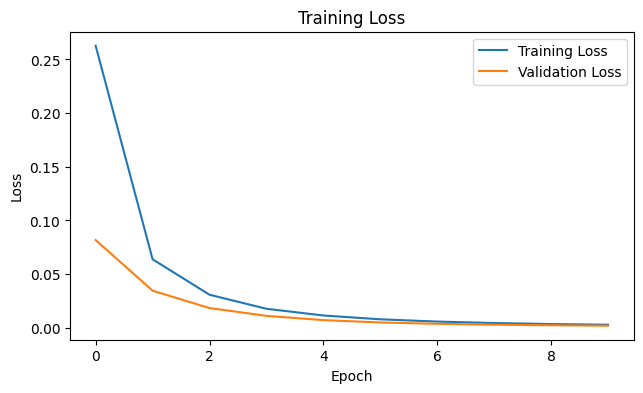

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Evaluating the model using
loss, mae = nn_model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Mean absolute error: {mae}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0027 - mae: 0.0251
Loss: 0.003479894483461976, Mean absolute error: 0.029325071722269058


In [ ]:
print(X.columns)
f"{np.min(X['bill_depth_mm'])}, {np.max(X['bill_depth_mm'])}"

Index(['bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'island_Biscoe', 'island_Dream',
       'island_Torgersen', 'sex_female', 'sex_male'],
      dtype='object')


'13.1, 21.5'

In [ ]:
# feature_list
# foo.columns

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# %%%%%%%%%%%%%%%%%%%%% YOU CAN CHANGE THESE INPUTS BELOW %%%%%%%%%%%%%%%%%%%%%
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

inputs = {"bill_depth_mm":30,  # ranges between 13.1 and 21.5
          "flipper_length": 210,  # ranges between 172 and 231
          "body_mass_g": 4200,  # ranges between 2700 and 6300
          "species": "Adelie",  # Adelie, Chistrap, or Gentoo
          "island": "Dream",  # Biscoe, Dream, or Torgersen
          "sex": "female"  # male or female
}

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# foo = set()
custom_inputs = [inputs["bill_depth_mm"],
                 inputs["flipper_length"],
                 inputs["body_mass_g"]]
print(X.columns)
for col in X.columns[3:]:
  if (col.rsplit('_')[-1] == inputs[col[:col.rfind('_')]]):
    custom_inputs.append(1)
  else:
    custom_inputs.append(0)
scaled_custom_inputs = scaler.transform(np.array([custom_inputs]))
output = nn_model.predict(scaled_custom_inputs)
print(f"Predicted bill length is: {output[0][0]*100:.0f}mm")

Index(['bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'island_Biscoe', 'island_Dream',
       'island_Torgersen', 'sex_female', 'sex_male'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted bill length is: 143mm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
